In [10]:
import pickle
import statistics

In [22]:
pickle_path = 'mnist_24.pkl'
with open(pickle_path, 'r') as pickle_file:
    inferece_stats = pickle.load(pickle_file)
# inferece_stats is a list, each element as output from a single process
# each output from a process is a tuple of size 2, [0]: list of accuracy, [1]: list of latencies

In [23]:
def all_stats(a):
    return ['{:.3f}'.format(max(a)), '{:.3f}'.format(statistics.mean(a)), '{:.3f}'.format(statistics.median(a)),
            '{:.3f}'.format(statistics.stdev(a)), '{:.3f}'.format(min(a))]

average_accuracy_per_worker = [sum(i[0]) / len(i[0]) for i in inferece_stats]
average_latencies_per_worker = [sum(i[1]) / len(i[1]) for i in inferece_stats]
all_request_accuracy = []
all_request_latency = []
for i in inferece_stats:
    all_request_accuracy.extend(i[0])
    all_request_latency.extend(i[1])
print('label ', 'max', 'mean', 'median', 'std', 'min')
print'accu   ', all_stats(all_request_accuracy)
print'latency', all_stats(all_request_latency)

('label ', 'max', 'mean', 'median', 'std', 'min')
accu ['1.000', '0.984', '1.000', '0.027', '0.500']
latency ['0.642', '0.030', '0.029', '0.013', '0.000']


In [ ]:
# result from last time
# ('label ', 'max', 'mean', 'median', 'std', 'min')
# accu ['1.000', '0.985', '1.000', '0.024', '0.469']
# latency ['0.666', '0.030', '0.029', '0.013', '0.000']

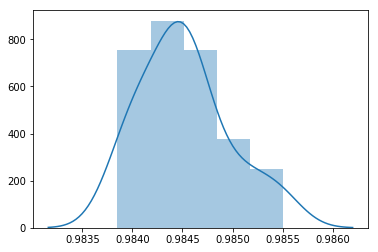

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(average_accuracy_per_worker)
# plt.title("average accuracy per worker")

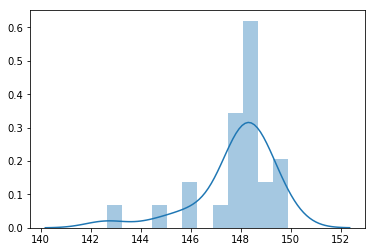

In [5]:
aggregate_latency_per_worker = [sum(i[1]) for i in inferece_stats]
sns.distplot(aggregate_latency_per_worker)

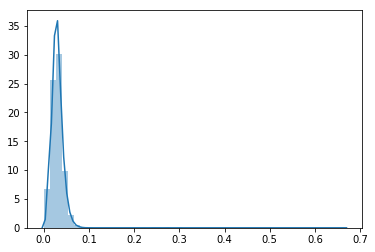

In [6]:
sns.distplot(all_request_latency)


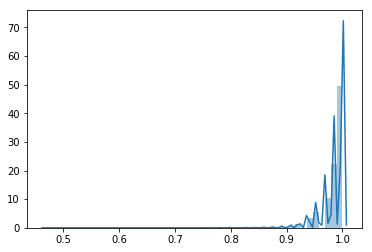

In [7]:
sns.distplot(all_request_accuracy)
